Instructions:

1. Export luff angle data from Catman as a .MAT file, copy the file path and update file_path6 in the code below. 

2. Export luff cylinder force data from Catman as a .MAT file, copy the file path and update file_path4 in the code below.

3. Update the xline, yline and label inputs with the relevant data. The values are the extremes of the lines. 

4. Delete any unused xline, yline and label variables from section 2 and section 5. 


1. Import Required Libraries

In [21]:
%clear -f
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import gaussian_kde

2. Enter Luff Trend Data

In [22]:
xline1 = [-15, 20]
yline1 = [50, 2220]
label1 = 'Boom Grounding Alarm'

xline2 = [-15, 20]
yline2 = [-89.45, 2004.6]
label2 = 'E (Design Dead Load)'

xline3 = [-15, 20]
yline3 = [-297.4, 1731.2]
label3 = 'E+V (Dead Load + Encrustation)'

xline4 = [-15, 20]
yline4 = [-2273, -852]
label4 = 'E+V+F+D (Design Operating)'

xline5 = [-15, 20]
yline5 = [-3528.4, -2885.8]
label5 = 'E+V+N+W+VV+FF+D - Design Limit'

xline6 = [-15, 20]
yline6 = [-75.85, 2149.8]
label6 = 'E (Clean Boom) as-built August 2013'



3. Add Luff Cylinder Force File Path

In [23]:
# Specify the absolute path to your FIRST .MAT file (cylidner force data)
file_path6 = r'E:\Jake - E Drive\2394 - BHP PIR - ST1/Cyl_force_1Hz.MAT'  # Update this with your actual file path

# Load the .MAT file
mat_data6 = loadmat(file_path6)

# Display the keys (variable names) in the .MAT file (machine position data)
print("Variables in the .MAT file:")
for key in mat_data6.keys():
    if not key.startswith('__'):  # Skip metadata keys
        print(f"  - {key}: {mat_data6[key].shape if hasattr(mat_data6[key], 'shape') else type(mat_data6[key])}")


# Extract data from the .MAT file
# Update 'data_variable' and 'time_variable' with your actual variable names
CF_array = mat_data6['Channel_1_Data'] 

# Convert to numpy arrays if not already
CF_array = np.array(CF_array).flatten()

print(f"\nData shape: {CF_array.shape}")
print(f"Data range: [{CF_array.min():.2f}, {CF_array.max():.2f}]")

Variables in the .MAT file:
  - Channel_1_Data: (7776009, 1)
  - Channel_1_Header: (1, 1)
  - File_Header: (1, 1)

Data shape: (7776009,)
Data range: [-580.73, 2210.84]


4. Add Luff Cylinder Angle File Path

In [24]:
# Specify the absolute path to .MAT file machine position (luff angle data). Depending on what you imported for the histogram, you may need to import slew angle as well, just copy this block and adjust import parameters)
file_path4 = r'E:\Jake - E Drive\2394 - BHP PIR - ST1\Luff_position_1Hz.MAT'  # Update this with your actual file path

# Load the .MAT file
mat_data4 = loadmat(file_path4)

# Display the keys (variable names) in the .MAT file
print("Variables in the .MAT file:")
for key in mat_data4.keys():
    if not key.startswith('__'):  # Skip metadata keys
        print(f"  - {key}: {mat_data4[key].shape if hasattr(mat_data4[key], 'shape') else type(mat_data4[key])}")


# Extract data from the .MAT file
# Update 'data_variable' and 'time_variable' with your actual variable names
luff_array = mat_data4['Channel_1_Data'] 

# Convert to numpy arrays if not already
luff_array = np.array(luff_array).flatten()

print(f"\nData shape: {luff_array.shape}")
print(f"Data range: [{luff_array.min():.2f}, {luff_array.max():.2f}]")

Variables in the .MAT file:
  - Channel_1_Data: (7776009, 1)
  - Channel_1_Header: (1, 1)
  - File_Header: (1, 1)

Data shape: (7776009,)
Data range: [-11.32, 14.91]


3. Plot Data and Lines

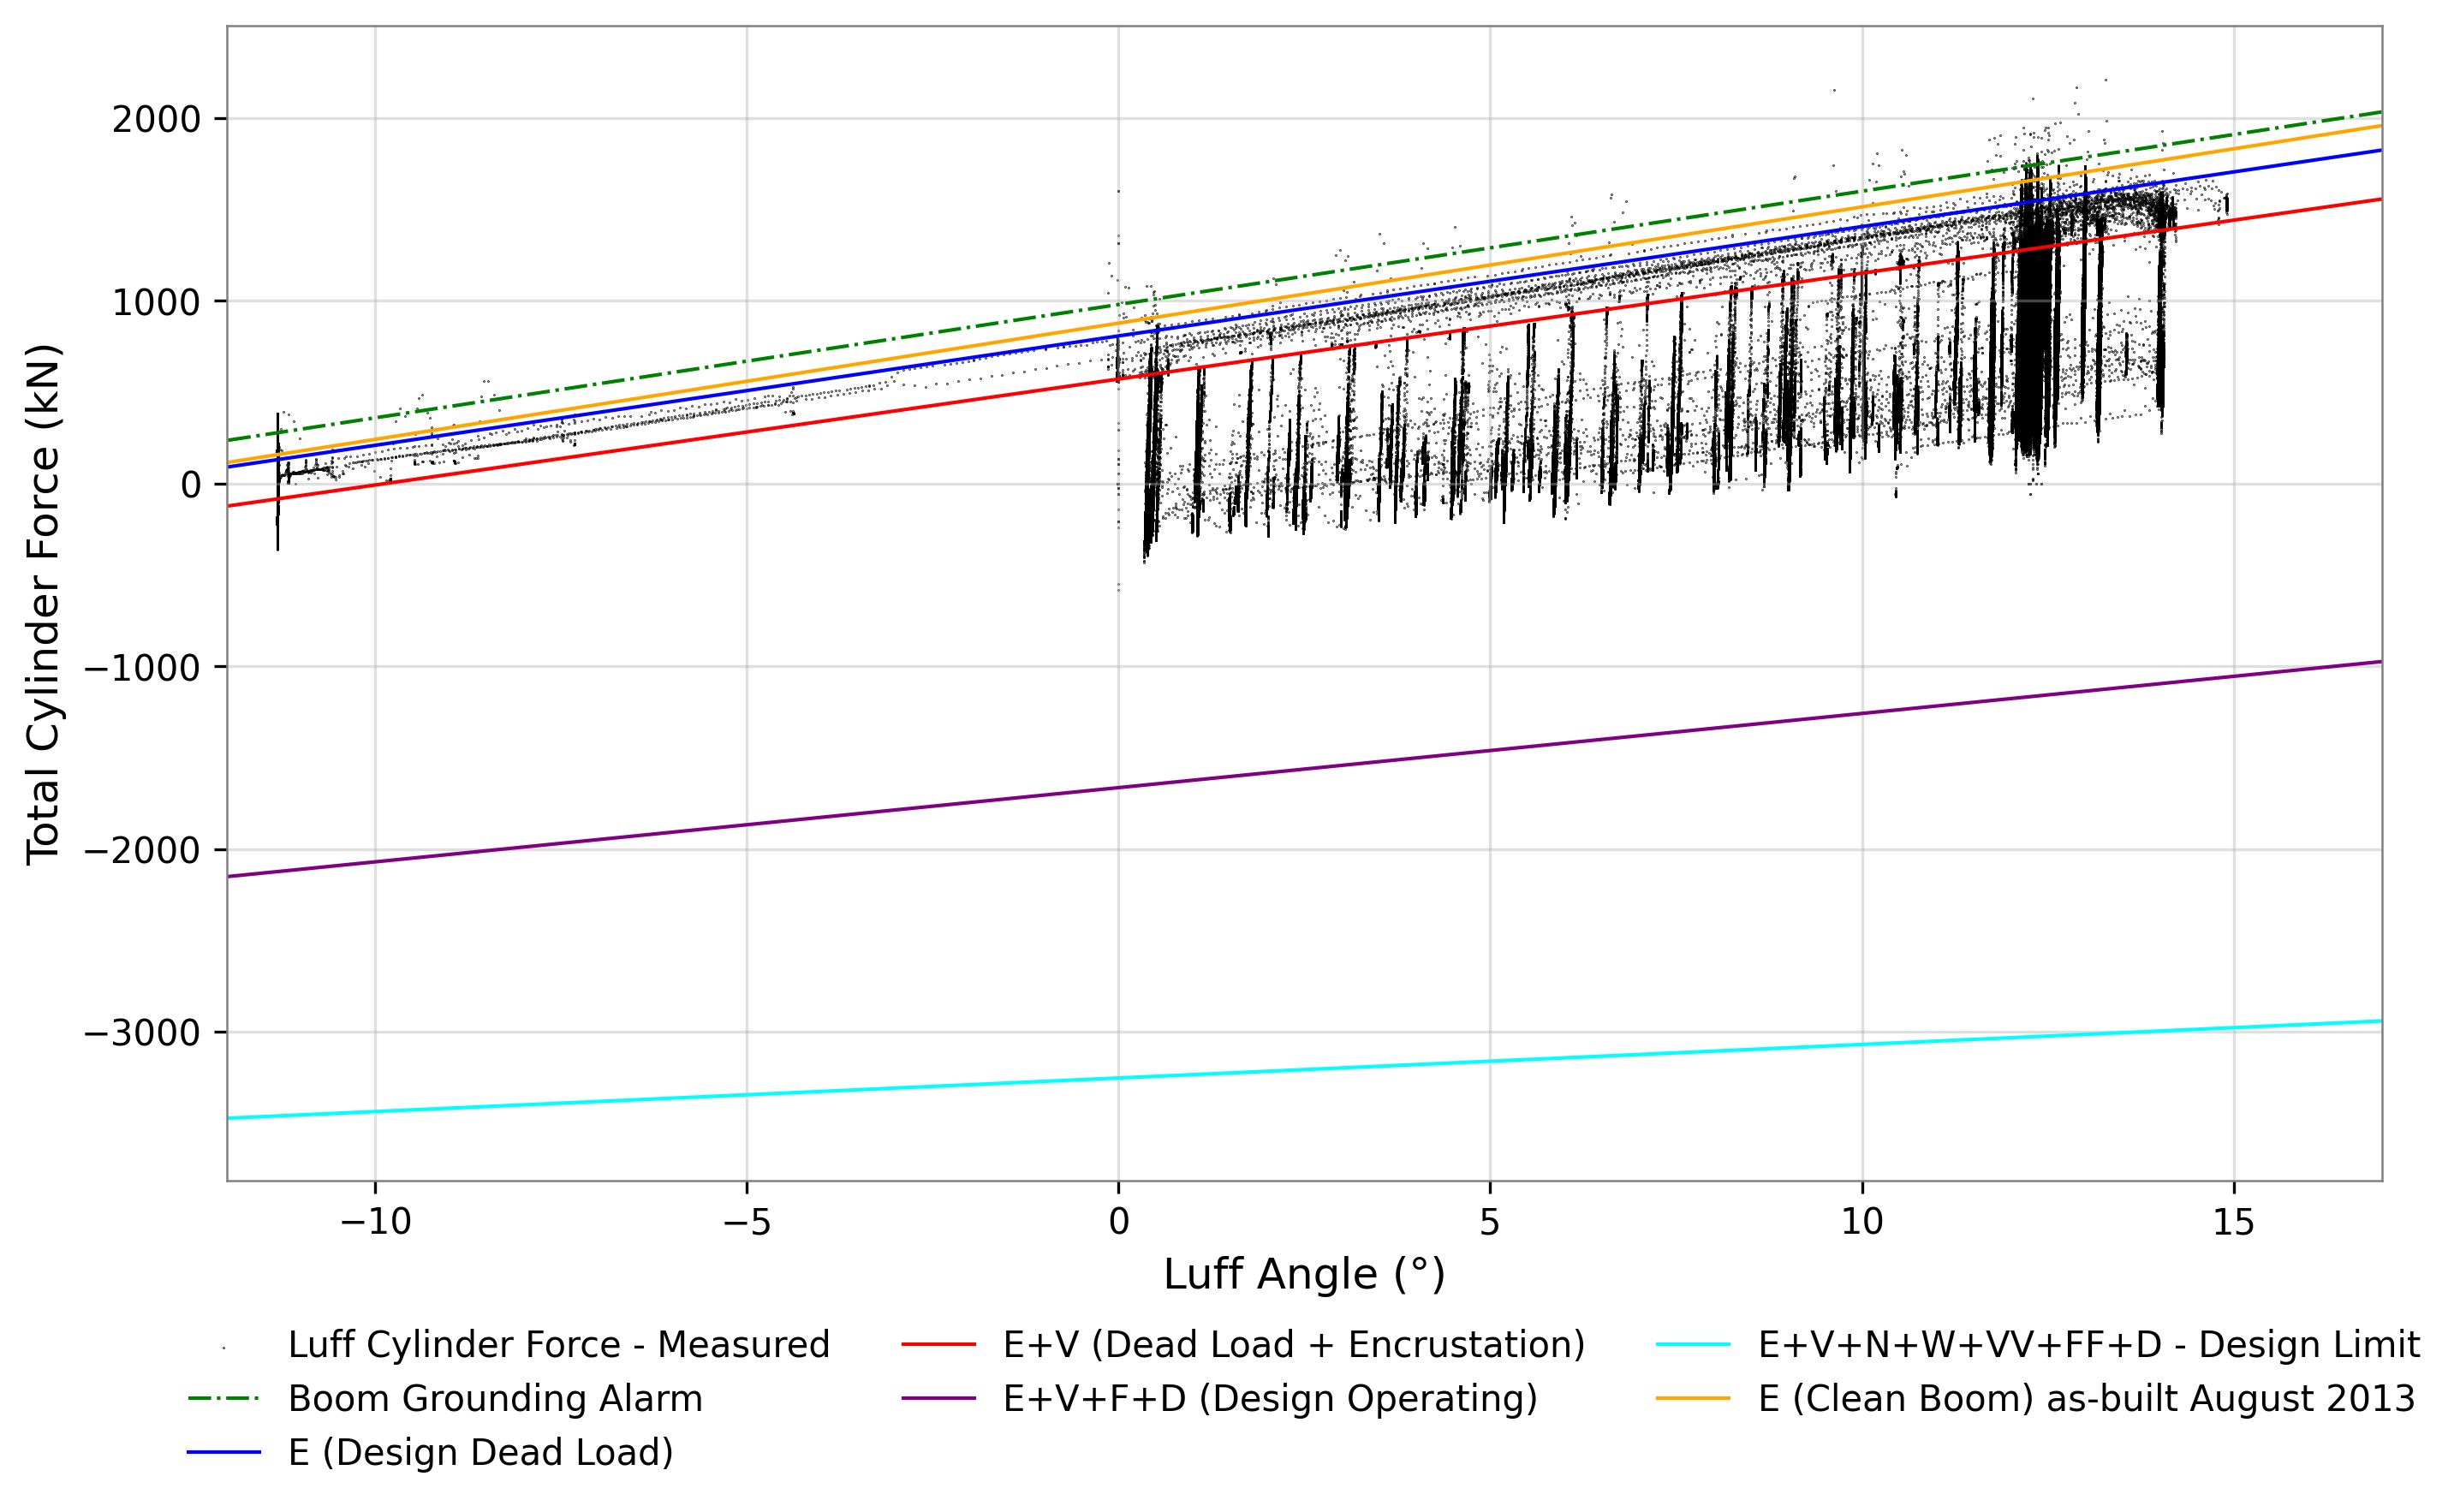

In [25]:
x = luff_array
y = CF_array

# Create figure and axes
fig, ax = plt.subplots(figsize=(10,6), dpi=300)

# Scatter plot of Catman data
ax.scatter(x, y, s=0.025, c='k', marker='o', linewidths=0.5, alpha=1, label='Luff Cylinder Force - Measured')

# Linear lines on the same axes
ax.plot(xline1, yline1, linewidth=1, linestyle='-.', color='green', label=label1)
ax.plot(xline2, yline2, linewidth=1, linestyle='-', color='blue', label=label2)
ax.plot(xline3, yline3, linewidth=1, linestyle='-', color='red', label=label3)
ax.plot(xline4, yline4, linewidth=1, linestyle='-', color='purple', label=label4)
ax.plot(xline5, yline5, linewidth=1, linestyle='-', color='cyan', label=label5)
ax.plot(xline6, yline6, linewidth=1, linestyle='-', color='orange', label=label6)

# Labels with degree symbol
ax.set_xlabel('Luff Angle (°)', fontsize=12)
ax.set_ylabel('Total Cylinder Force (kN)', fontsize=12)

# Grid
ax.grid(True, linestyle='-', alpha=0.4)

# Legend below the plot, horizontal, no box
ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.1),
    ncol=3,
    fontsize=10,
    frameon=False
)

# Axis limits
ax.set_xlim(-12, 17)

# Thinner, lighter spines
for spine in ax.spines.values():
    spine.set_linewidth(0.6)
    spine.set_edgecolor('grey')

# Optimize layout
plt.tight_layout()

# Show figure
plt.show()
